In [1]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

import tarfile
import urllib

#!pip install seaborn
!pip install yellowbrick

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer



from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


https://medium.com/@dennisndungu68/text-classification-using-k-means-33bea24e4a94

https://realpython.com/k-means-clustering-python/#how-to-build-a-k-means-clustering-pipeline-in-python

https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a


In [3]:
df = pd.read_csv(r'master.csv')

In [4]:
df.head()

,index,title,year,wos,en,link,abstract,citations,clean_abstract,abstract_length
0,0,Financing Climate Change Adaptation: Internati...,2021.0,WOS:000666451800001,True,"<a href=""https://www.webofscience.com/wos/wosc...",Climate change adaptation is one of the main s...,27,one main strategy address global least develop...,64
1,1,Driving the agenda for climate change adaptati...,2013.0,WOS:000320956800008,True,"<a href=""https://www.webofscience.com/wos/wosc...",The absence of clear signals from the Norwegia...,55,absence clear signal norwegian state concernin...,62
2,2,Climate change adaptation policies and plans: ...,2018.0,WOS:000417078200110,True,"<a href=""https://www.webofscience.com/wos/wosc...",Building a climate-ready adaptation society is...,48,building ready society urgent question cannot ...,167
3,3,Place-based climate change adaptation: A criti...,2014.0,WOS:000345061100013,True,"<a href=""https://www.webofscience.com/wos/wosc...",Climate change adaptation frameworks often emp...,66,framework often emphasize tangible community v...,113
4,4,Responsibility for private sector adaptation t...,2014.0,WOS:000338711600014,True,"<a href=""https://www.webofscience.com/wos/wosc...",The Intergovernmental Panel on Climate Change ...,56,intergovernmental panel 2007 indicates vulnera...,168


In [6]:
vectorizer = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english')
#data = vectorizer.fit_transform(df["clean_abstract"]).toarray()

embeddings = np.load(r'embeddings.npy')

data = embeddings

2  no. of clusters yields an average silhuette score of:  0.064060755
3  no. of clusters yields an average silhuette score of:  0.05504434
4  no. of clusters yields an average silhuette score of:  0.05640174
5  no. of clusters yields an average silhuette score of:  0.046020467
6  no. of clusters yields an average silhuette score of:  0.044758614
7  no. of clusters yields an average silhuette score of:  0.043073814
8  no. of clusters yields an average silhuette score of:  0.038477913
9  no. of clusters yields an average silhuette score of:  0.041133486
10  no. of clusters yields an average silhuette score of:  0.03810857
11  no. of clusters yields an average silhuette score of:  0.034354858
Rember that you should choose cluster size so that the clusters are relatively equal in size


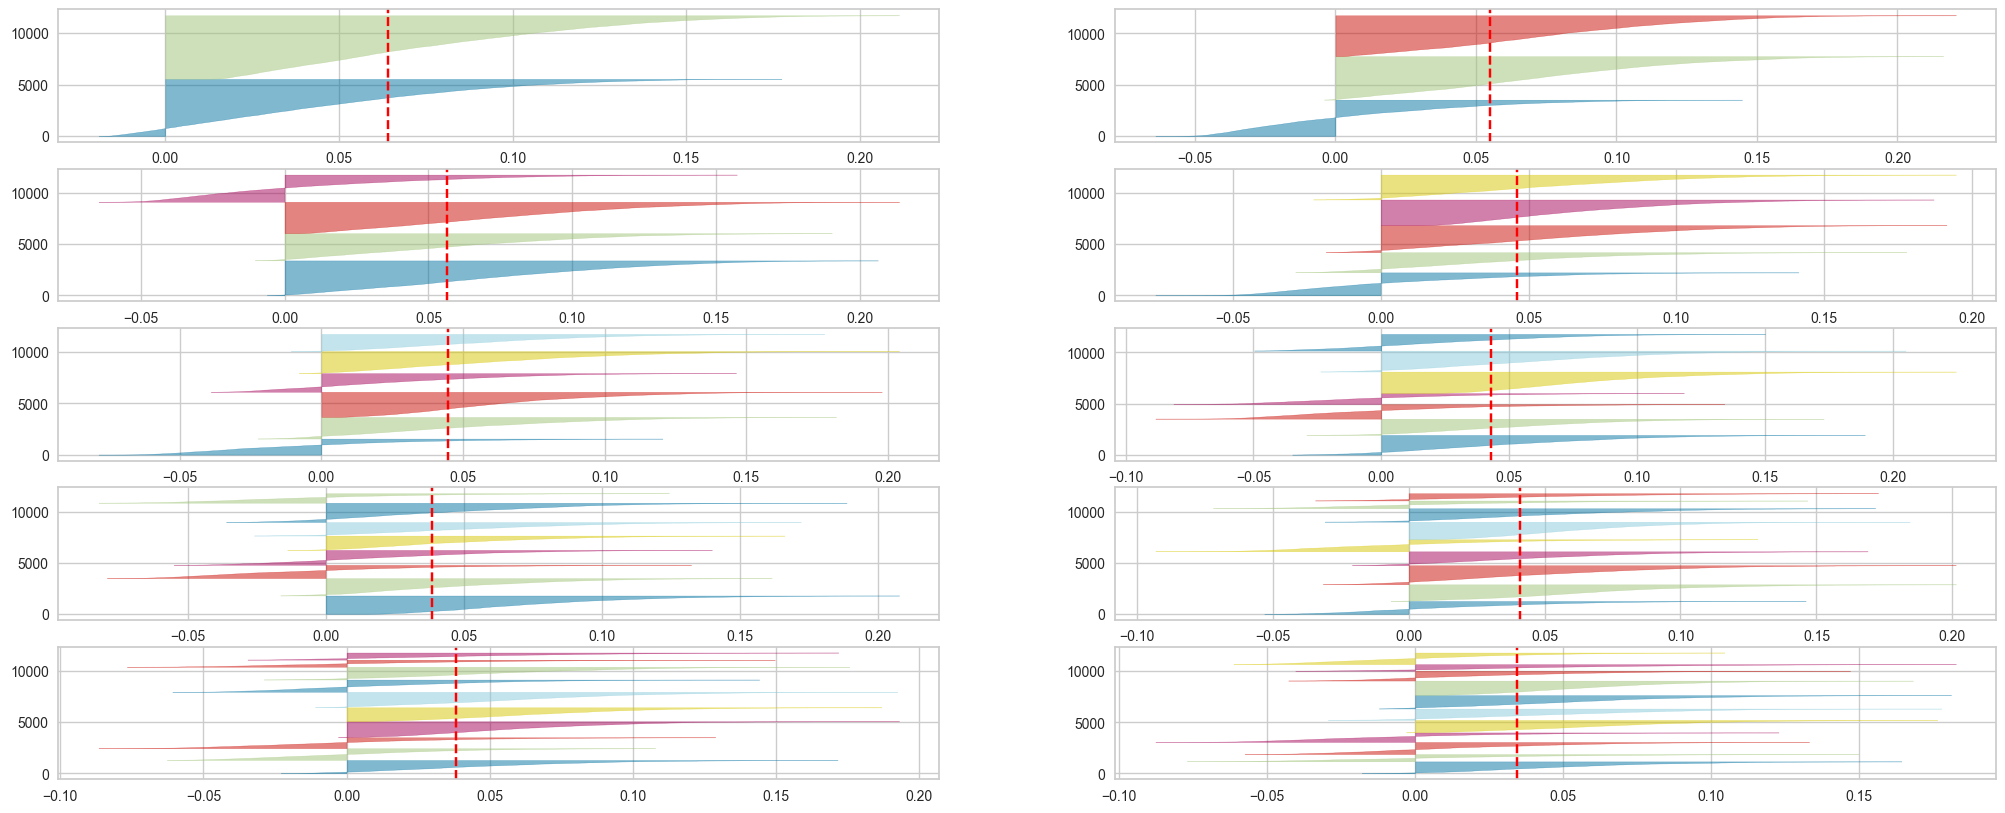

In [39]:
 
fig, ax = plt.subplots(5, 2, figsize=(25,10))
silhouette_avg = []
sse = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in range_n_clusters:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)
    
    #silhouette score
    ss = silhouette_score(data, km.labels_)
    silhouette_avg.append(ss)

    # use SSE for elbow method
    sse.append(km.inertia_)

    # Display which iteration we are on
    print(i, " no. of clusters yields an average silhuette score of: ", ss)

print("Rember that you should choose cluster size so that the clusters are relatively equal in size")

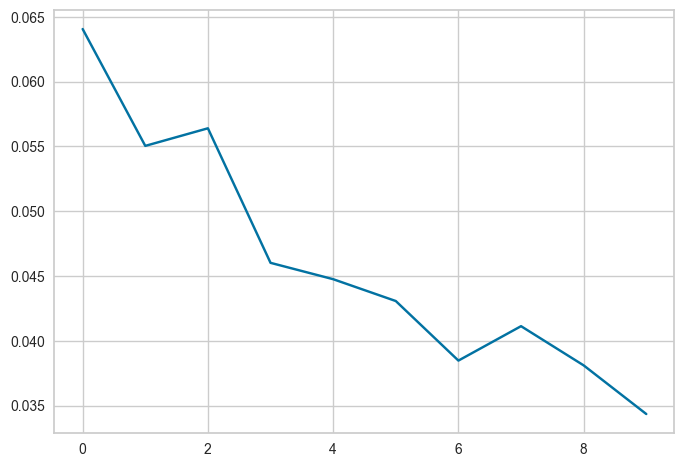

In [40]:
plt.plot(silhouette_avg)


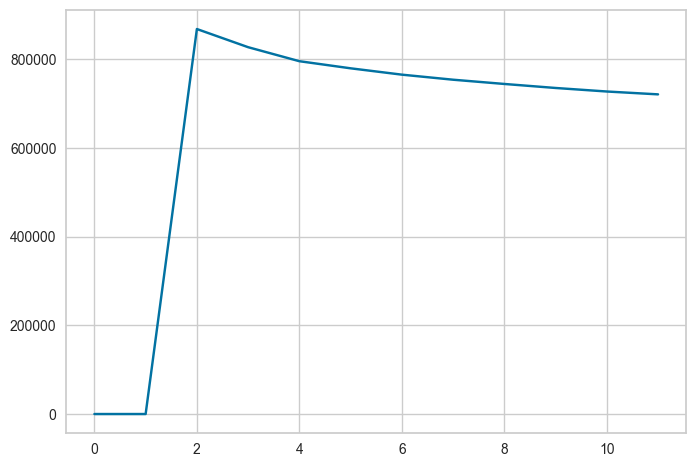

In [41]:
plt.plot([0, 0] + sse)

In [19]:
n_clusters = 5

preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)


In [20]:
pipe.fit(data)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [21]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)


0.9600019587810832

In [22]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

kmeans.fit(data)



KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
print(kmeans.inertia_)


# Final locations of the centroid
print(kmeans.cluster_centers_)


# The number of iterations required to converge
print(kmeans.n_iter_)

label = kmeans.fit_predict(data)


11159.916310040553
[[ 3.60997303e-05  6.49211535e-04 -1.28749008e-19 ... -1.35525272e-20
  -1.69406589e-21  7.96210970e-20]
 [ 6.81474803e-04  1.02540189e-03 -8.47032947e-22 ...  1.62787341e-04
   1.18584613e-20 -2.20228566e-20]
 [ 5.18693533e-04  1.97148516e-03  1.81446008e-05 ...  2.37169225e-20
   2.13531383e-05  2.10198471e-05]]
23


In [23]:
# A list holds the SSE values for each k
run = True

if run:
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        print(k)


1


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 180, in where
  File "C:\Users\ntn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\multiarray.py", line 345, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 
